<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Mercado-Financeiro/blob/main/Case_MZR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carregando os dados**

In [270]:
import pandas as pd #operações com tabelas
import numpy as np #operações matemáticas
!pip install xlsxwriter #gerar o excel com várias abas de clientes
import calendar # operações com data
import datetime #operações com data
import random #gerar números aleatórios em um intervalo
import matplotlib.pyplot as plt
import seaborn as sns


In [271]:
arquivo_excel = pd.ExcelFile("/content/drive/MyDrive/Portfólio/Case da MZR/Desafio VBA.xlsx") #Carrega o arquivo em excel

operações = pd.read_excel(arquivo_excel, sheet_name='Trade Output', header=1)# index_col= 'Date & Time' # coloco em um DataFrame as abas desejadas
desafio = operações.copy()
desafio.head()

,Unnamed: 0,Date & Time,Stock,B/S,Amount,Client,Price
0,NaN,2021-05-07 13:32:31.350,BBDC3,B,5,1040,20.82
1,NaN,2021-05-07 13:32:32.214,PETR4,S,5,1040,25.19
2,NaN,2021-05-07 13:32:33.078,SANB11,S,20,Mesa,38.91
3,NaN,2021-05-07 13:32:33.942,PETR4,S,10,2806,23.54
4,NaN,2021-05-07 13:32:34.806,BBDC3,B,10,2030,21.11


In [272]:
desafio.drop(columns='Unnamed: 0', inplace=True) #eliminando a coluna vazia
desafio.info()
#Verificando os dados e a tipagem
#não há dados faltantes e nem nulos nas 1000 linhas
#tipagem feita corretamente, portanto não é necessário alterar nada.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date & Time  1000 non-null   datetime64[ns]
 1   Stock        1000 non-null   object        
 2   B/S          1000 non-null   object        
 3   Amount       1000 non-null   int64         
 4   Client       1000 non-null   object        
 5   Price        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 47.0+ KB


In [273]:
#A coluna B/S, significa B=Buy e S=Sell, então substituiremos B por 1 e S por -1.
compra_venda = {'B':1,'S':-1}
desafio['B/S'] = desafio['B/S'].map(compra_venda)
#esafio['Compra/Venda'] = desafio['B/S'].map(compra_venda) ou criar uma nova coluna
desafio.head()

,Date & Time,Stock,B/S,Amount,Client,Price
0,2021-05-07 13:32:31.350,BBDC3,1,5,1040,20.82
1,2021-05-07 13:32:32.214,PETR4,-1,5,1040,25.19
2,2021-05-07 13:32:33.078,SANB11,-1,20,Mesa,38.91
3,2021-05-07 13:32:33.942,PETR4,-1,10,2806,23.54
4,2021-05-07 13:32:34.806,BBDC3,1,10,2030,21.11


In [274]:
#Regra:Posições vendidas devem entrar com sinal negativo nas carteiras.
#optei por tanto as quantidades quanto o preço receberem sinal negativo quando a operação for de venda
desafio['Amount'] = desafio['B/S'] * desafio.Amount
desafio['Price'] = desafio['B/S'] * desafio.Price
desafio.tail()

,Date & Time,Stock,B/S,Amount,Client,Price
995,2021-05-07 13:46:51.030,MGLU3,-1,-10,3018,-18.47
996,2021-05-07 13:46:51.894,SANB11,-1,-20,1150,-41.16
997,2021-05-07 13:46:52.758,MGLU3,-1,-10,1040,-19.85
998,2021-05-07 13:46:53.622,BPAC11,-1,-10,1040,-110.94
999,2021-05-07 13:46:54.486,SANB11,-1,-10,1917,-41.40


In [275]:
# Criando uma lista de Clientes da base para posterior agrupamento e iteração
clientes = list(desafio.Client.unique()) 
clientes.remove('Mesa') #removendo a Mesa que não é uma 'cliente'.
clientes

[1040, 2806, 2030, 1917, 1150, 3018]

# **Mesa**
As boletas registradas sob o operador “Mesa” devem ser especificadas para TODOS os clientes de forma equânime, ou seja, com o mesmo preço médio de forma que não haja seleção de preço por cliente (Fair Dealing).  

In [276]:
#filtrando as operações da Mesa
mesa = desafio.loc[desafio.Client == 'Mesa']
mesa.head()

,Date & Time,Stock,B/S,Amount,Client,Price
2,2021-05-07 13:32:33.078,SANB11,-1,-20,Mesa,-38.91
8,2021-05-07 13:32:38.262,ITUB4,1,15,Mesa,29.43
41,2021-05-07 13:33:06.774,BBDC3,1,5,Mesa,22.97
43,2021-05-07 13:33:08.502,BPAC11,1,5,Mesa,112.02
49,2021-05-07 13:33:13.686,MGLU3,1,15,Mesa,20.80


## Compra Mesa

In [277]:
#Ações compradas
mesa_compr = mesa.loc[mesa['B/S'] == 1]
mesa_compr.head()

,Date & Time,Stock,B/S,Amount,Client,Price
8,2021-05-07 13:32:38.262,ITUB4,1,15,Mesa,29.43
41,2021-05-07 13:33:06.774,BBDC3,1,5,Mesa,22.97
43,2021-05-07 13:33:08.502,BPAC11,1,5,Mesa,112.02
49,2021-05-07 13:33:13.686,MGLU3,1,15,Mesa,20.80
52,2021-05-07 13:33:16.278,ITUB4,1,10,Mesa,28.68


In [278]:
#lista de ações mesa
stock_mesa = list(mesa.Stock.unique())
stock_mesa

['SANB11', 'ITUB4', 'BBDC3', 'BPAC11', 'MGLU3', 'PETR4']

In [279]:
#Criando um Data Frame neg_mesa para armazenar os Resultados das Negociação da mesa
neg_mesa = pd.DataFrame(columns=['Stock','Amount','Price'])
neg_mesa

,Stock,Amount,Price


In [280]:
#Calculando a média por ação e armazeando no DF
for x in stock_mesa:
  acoes_x = mesa_compr.loc[mesa_compr.Stock == x]
  negociadas = acoes_x.Amount.sum() #somando as quantidades de cada ação
  preco_medio = (np.average(acoes_x.Price,weights=acoes_x.Amount)).round(2) #media ponderada arredondando para 2 casas decimais
  neg_mesa = neg_mesa.append({"Stock":x,"Amount":negociadas,'Price':preco_medio}, ignore_index=True)


In [281]:
neg_mesa

,Stock,Amount,Price
0,SANB11,170,39.91
1,ITUB4,150,27.99
2,BBDC3,130,21.34
3,BPAC11,195,111.75
4,MGLU3,205,20.20
5,PETR4,220,24.93


## Venda Mesa

In [282]:
#Ações Vendidas
mesa_vend = mesa.loc[mesa['B/S'] == -1]
mesa_vend.head()

for x in stock_mesa:
  acoes_x = mesa_vend.loc[mesa_vend.Stock == x]
  negociadas = acoes_x.Amount.sum()
  preco_medio = (np.average(acoes_x.Price,weights=acoes_x.Amount)).round(2)  #media ponderada arredondando para 2 casas decimais
  neg_mesa = neg_mesa.append({"Stock":x,"Amount":negociadas,'Price':preco_medio}, ignore_index=True)
  
neg_mesa.sort_values(by='Stock',inplace=True) #organizando em ordem alfabética

#Criando uma planilha xlsx para armazenar nas abas as posições de cada cliente
operacoes_mesa = pd.ExcelWriter('operacoes_mesa.xlsx', engine='xlsxwriter') 

#adicionando as operações em abas do xlsx
neg_mesa.to_excel(operacoes_mesa, sheet_name= 'Operações Mesa') 

## Resultado da Carteira Mesa

In [283]:
#tirar o sinal negativo de price e nao alterar o registro principal
neg_mesa_1 =neg_mesa.copy()
neg_mesa_1['Price'] = abs(neg_mesa_1['Price']) #deixando o valor preço positivo para agrupar e calcular a média de preços
neg_mesa_1

,Stock,Amount,Price
2,BBDC3,130,21.34
8,BBDC3,-75,20.51
3,BPAC11,195,111.75
9,BPAC11,-190,111.97
1,ITUB4,150,27.99
7,ITUB4,-125,28.36
4,MGLU3,205,20.20
10,MGLU3,-115,19.41
5,PETR4,220,24.93
11,PETR4,-245,25.34


In [284]:
#agrupando por ação e calculando a média. Considerei para a média aritmética dos preços de venda e compra.
posição_mesa = neg_mesa_1.groupby('Stock').agg({'Amount':'sum',
                               'Price': 'mean'})

posição_mesa.reset_index(inplace=True)

posição_mesa.to_excel(operacoes_mesa, sheet_name= 'Posição Mesa') #incluindo aba no arquivo excel 

operacoes_mesa.save() # output em excel

posição_mesa

,Stock,Amount,Price
0,BBDC3,55,20.925
1,BPAC11,5,111.860
2,ITUB4,25,28.175
3,MGLU3,90,19.805
4,PETR4,-25,25.135
5,SANB11,-15,39.810


Não entendi como seria a divisão equânime, se seria por peso ponderado de ações ou se divide igualmente entre os clientes ou outro critério.
O que adotei foi dividir a carteira Mesa pelo número de clientes, mesa_fracionada, e adicionar a carteira de cada cliente para consolidar  a posição deste.

In [285]:
mesa_fracionada = posição_mesa.copy()
mesa_fracionada['Amount'] = mesa_fracionada['Amount']/ len(clientes) 
posição_mesa

,Stock,Amount,Price
0,BBDC3,55,20.925
1,BPAC11,5,111.860
2,ITUB4,25,28.175
3,MGLU3,90,19.805
4,PETR4,-25,25.135
5,SANB11,-15,39.810


# **Divisão de ações inteiras e Sorteio das ações excedentes**


In [286]:
stock_mesa

['SANB11', 'ITUB4', 'BBDC3', 'BPAC11', 'MGLU3', 'PETR4']

In [287]:
divisão_eq_mesa = pd.DataFrame(columns=['Stock','Amount','Price']) #criando DataFrame para armazenar as ações inteiras
sorteio_mesa = pd.DataFrame(columns=['Stock','Amount','Price']) #criando Data Frame para armazenar as ações que serão divididas por sorteio

for x in stock_mesa:
  a = posição_mesa[posição_mesa.Stock == x] #separo por ações x
  b= int(abs(a.Amount) % len(stock_mesa))  # se há resto na divisão pela quantidade de clientes
  
  if b == 0: #caso não haja resto
    c=int(a.Amount/(len(stock_mesa)))
    divisão_eq_mesa = divisão_eq_mesa.append({"Stock":x,"Amount":c,'Price':preco_medio}, ignore_index=True)

  else:
    if int(a.Amount) < 0: #se houver resto, isto é, a divisão não for inteira
      b = -1 * b #condição de compra ou venda que influencia no sinal 
      c=int(a.Amount/(len(stock_mesa)))
      divisão_eq_mesa = divisão_eq_mesa.append({"Stock":x,"Amount":c,'Price':preco_medio}, ignore_index=True).sort_values(by='Stock')
      sorteio_mesa = sorteio_mesa.append({"Stock":x,"Amount":b,'Price':preco_medio}, ignore_index=True).sort_values(by='Stock')
    
    else: 
      c=int(a.Amount/(len(stock_mesa)))
      divisão_eq_mesa = divisão_eq_mesa.append({"Stock":x,"Amount":c,'Price':preco_medio}, ignore_index=True).sort_values(by='Stock')
      sorteio_mesa = sorteio_mesa.append({"Stock":x,"Amount":b,'Price':preco_medio}, ignore_index=True).sort_values(by='Stock')

#Regra para eliminar, caso tenha, linhas com posições igual a zero, no caso tem a BPAC11
divisão_eq_mesa.drop(list(divisão_eq_mesa[divisão_eq_mesa.Amount == 0].index), inplace=True)
 
    

display(divisão_eq_mesa)
display(sorteio_mesa)

,Stock,Amount,Price
0,BBDC3,9,-25.34
2,ITUB4,4,-25.34
4,MGLU3,15,-25.34
5,PETR4,-4,-25.34
3,SANB11,-2,-25.34


,Stock,Amount,Price
0,BBDC3,1,-25.34
1,BPAC11,5,-25.34
2,ITUB4,1,-25.34
4,PETR4,-1,-25.34
3,SANB11,-3,-25.34


In [288]:
clientes #listas de clientes serão alocadas as ações por sorteio.

[1040, 2806, 2030, 1917, 1150, 3018]

In [289]:
desafio.shape # conferindo o tamanho antes de atribuir as ações por sorteio


(1000, 6)

In [290]:
#nome das ações a serem sorteadas
stock_sorteio = list(sorteio_mesa.Stock)

for x in stock_sorteio:
  a = sorteio_mesa[sorteio_mesa.Stock == x] #cada ção a ser sorteada
  quantidade_ações = int(abs(a.Amount)) #quantidade a ser sorteada de cada ação
  
  while (quantidade_ações > 0):
    cliente_sorteado = clientes[random.randint(0,len(clientes)-1)] #Sorteio do cliente, cada vez que roda o resultado é diferente do anterior
    if int(a.Amount > 0): #condição para a ação entrar como venda ou compra na carteira do cliente com b=1 ou b = -1
      b=1
      desafio = desafio.append({'Date & Time': max(desafio['Date & Time']),
                                                 "Stock":x,
                                                 "B/S":b,
                                                 "Amount":b, 
                                                 "Client":cliente_sorteado,                               
                                                 'Price':float(a.Price)}, ignore_index=True)
    
    else:
      b= -1
      desafio = desafio.append({'Date & Time': max(desafio['Date & Time']),
                                                 "Stock":x,
                                                 "B/S":b,
                                                 "Amount":b, 
                                                  "Client":cliente_sorteado, 
                                                 'Price':float(a.Price)}, ignore_index=True)

    quantidade_ações = quantidade_ações - 1
  

In [291]:
desafio.shape #Conferindo se entraram os valores no dataset desafio.

(1011, 6)

# **Para Qualquer Cliente**

In [292]:
clientes

[1040, 2806, 2030, 1917, 1150, 3018]

In [293]:
#Criando uma planilha xlsx para armazenar nas abas as posições de cada cliente
posicoes_clientes = pd.ExcelWriter('posicoes_clientes.xlsx', engine='xlsxwriter') 

for y in clientes:
  a = desafio[desafio.Client == y] #armazena todas as posições do cliente y
  nome_cliente = 'Client - '+ str(y) 
   
  #lista de ações do cliente y
  stock_client = list(a.Stock.unique()) 

  #Criando um Data Frame vazio para armazenar os Resultados, ele é limpado a cada iteração
  neg_client = pd.DataFrame(columns=['Stock','Amount','Price'])  

  #Ações compradas do cliente y
  a_compr = a[a['B/S'] == 1]  

  #Ações Vendidas do cliente y
  a_vend = a[a['B/S'] == -1]
  
  
  #Calculando a média ponderada por ação comprada e armazeando no DataFrame
  for x in stock_client:
    acoes_x = a_compr.loc[a_compr.Stock == x]
    negociadas = acoes_x['Amount'].sum()
    preco_medio = (np.average(acoes_x.Price,weights=acoes_x.Amount)).round(2)  #media ponderada arredondando para 2 casas decimais
    neg_client = neg_client.append({"Stock":x,"Amount":negociadas,'Price':preco_medio}, ignore_index=True)
            
  #Calculando a média ponderada por ação vendida e armazeando no DataFrame
    acoes_x = a_vend.loc[a.Stock == x]
    negociadas = acoes_x['Amount'].sum()
    preco_medio = (np.average(acoes_x.Price,weights=acoes_x.Amount)).round(2)  #media ponderada arredondando para 2 casas decimais  
    neg_client = neg_client.append({"Stock":x,"Amount":negociadas,'Price':preco_medio}, ignore_index=True)

  #acrescentando a posiçaõ da Mesa à carteira do cliente
  neg_client = pd.concat([neg_client,divisão_eq_mesa], axis=0)
       
  #posição final do cliente
  neg_client['Price'] = abs(neg_client['Price']) #deixando todos os valores positivos para calcular a média
  neg_client = neg_client.groupby('Stock').agg({'Amount':'sum','Price':'mean'})
  
  #Regra para eliminar, caso tenha, linhas com posições igual a zero
  neg_client.drop(list(neg_client[neg_client.Amount == 0].index), inplace=True)
 
  #organizando em ordem alfabética
  neg_client.sort_values(by='Stock', ascending=True, inplace=True) 
  neg_client.reset_index(inplace=True)

  neg_client.to_excel(posicoes_clientes, sheet_name= nome_cliente) #adiciona as operações em abas do xlsx

  display(nome_cliente, neg_client) #exibindo as posições de cada cliente no período

posicoes_clientes.save()  #salvando o xlsx 
  

'Client - 1040'

,Stock,Amount,Price
0,BBDC3,-105,21.900000
1,BPAC11,61,111.565000
2,ITUB4,209,26.973333
3,MGLU3,-25,21.570000
4,PETR4,166,25.340000
5,SANB11,53,34.906667


'Client - 2806'

,Stock,Amount,Price
0,BBDC3,19,22.466667
1,BPAC11,25,112.625000
2,ITUB4,5,27.163333
3,MGLU3,-30,21.726667
4,PETR4,-115,24.973333
5,SANB11,-137,34.866667


'Client - 2030'

,Stock,Amount,Price
0,BBDC3,239,22.713333
1,BPAC11,131,111.495000
2,ITUB4,-26,26.903333
3,MGLU3,150,21.910000
4,PETR4,-49,25.193333
5,SANB11,157,34.946667


'Client - 1917'

,Stock,Amount,Price
0,BBDC3,29,22.190000
1,BPAC11,30,111.485000
2,ITUB4,-66,27.146667
3,MGLU3,-130,22.186667
4,PETR4,136,25.300000
5,SANB11,-27,35.153333


'Client - 1150'

,Stock,Amount,Price
0,BBDC3,44,22.720000
1,BPAC11,43,111.015000
2,ITUB4,14,27.136667
3,MGLU3,40,22.023333
4,PETR4,26,25.233333
5,SANB11,182,35.420000


'Client - 3018'

,Stock,Amount,Price
0,BBDC3,-26,22.596667
1,BPAC11,5,112.065000
2,ITUB4,99,26.980000
3,MGLU3,-65,21.630000
4,PETR4,-94,25.366667
5,SANB11,17,35.130000


# **Desafio Adicional**

Desafio adicional:
Uma carteira já possui posições prévias, então a macro deve ser capaz de calcular o novo preço médio considerando as posições já detidas pelo cliente.
Se o cliente por acaso zerar uma posição que tenha na carteira, exclua a linha deste ativo.


In [294]:
#Carregando o arquivo da carteira prévia
arquivo_excel_2 = pd.ExcelFile("/content/drive/MyDrive/Portfólio/Case da MZR/Desafio VBA.xlsx") #Carrego o excel

Cliente = pd.read_excel(arquivo_excel_2, sheet_name='Client - 1150', header=3)# index_col= 'Date & Time' # coloco em um DataFrame as abas desejadas
cliente_1150 = Cliente.copy()
cliente_1150.drop(columns='Unnamed: 0', inplace= True)
cliente_1150

,Ticker,Amount,Price,Sector
0,BBDC3,20,20.82,Banking
1,PETR4,10,25.19,Oil and Gas
2,SANB11,5,38.91,Banking
3,MGLU3,5,18.48,Retail
4,ITUB4,10,28.07,Banking
5,BPAC11,5,110.50,Banking


In [295]:
#separando os setores para juntá-los no final
# setores = dict(zip(ações,setor))
setores = {"BBDC3":"Banking",'PETR4':'Oil and Gas','SANB11':'Banking','MGLU3':'Retail','ITUB4':'Banking', 'BPAC11':'Banking' }
#setores

In [296]:
#carregando o arquivo com todas as negociações do cliente do arquivo desafio

cliente_1150_2 = desafio[desafio.Client == 1150][['Stock','Amount','Price']] #escolho somente as 3 colunas para juntar com os dados da carteira
cliente_1150_2

,Stock,Amount,Price
11,SANB11,-5,-40.24
13,BPAC11,-10,-110.50
14,ITUB4,-5,-27.33
19,PETR4,15,24.45
24,BBDC3,-25,-22.32
...,...,...,...
996,SANB11,-20,-41.16
1001,BPAC11,1,-25.34
1002,BPAC11,1,-25.34
1003,BPAC11,1,-25.34


In [297]:
#renomeando a coluna stock para poder juntar as duas tabelas pois precisam ter o mesmo nome para sair já configurada
cliente_1150_2.rename(columns={'Stock':'Ticker'}, inplace=True)

#juntando as tabelas
cliente_1150_posições = pd.concat([cliente_1150_2,cliente_1150], axis=0)

#excluindo a coluna Setor, mas não é obrigatório
cliente_1150_posições.drop(columns=['Sector'], inplace=True)
                                  
cliente_1150_posições

,Ticker,Amount,Price
11,SANB11,-5,-40.24
13,BPAC11,-10,-110.50
14,ITUB4,-5,-27.33
19,PETR4,15,24.45
24,BBDC3,-25,-22.32
...,...,...,...
1,PETR4,10,25.19
2,SANB11,5,38.91
3,MGLU3,5,18.48
4,ITUB4,10,28.07


In [299]:
#ações presentes na carteira
stock_client = list(cliente_1150_posições.Ticker.unique())
stock_client

['SANB11', 'BPAC11', 'ITUB4', 'PETR4', 'BBDC3', 'MGLU3']

In [300]:
neg_client = pd.DataFrame(columns=['Ticker','Amount','Price'])  

#ações compradas
a_compr = cliente_1150_posições[cliente_1150_posições.Amount > 0]

for x in stock_client:
    acoes_x = a_compr.loc[a_compr.Ticker == x]
    negociadas = acoes_x['Amount'].sum()
    preco_medio = (np.average(acoes_x.Price,weights=acoes_x.Amount)).round(2)  #media ponderada arredondando para 2 casas decimais   
    neg_client = neg_client.append({"Ticker":x,"Amount":negociadas,'Price':preco_medio}, ignore_index=True)

#ações vendidas
a_vend = cliente_1150_posições[cliente_1150_posições.Amount < 0]

for x in stock_client:
    acoes_x = a_vend.loc[a_vend.Ticker == x]
    negociadas = acoes_x['Amount'].sum()
    preco_medio = (np.average(acoes_x.Price,weights=acoes_x.Amount)).round(2)  #media ponderada arredondando para 2 casas decimais)
    neg_client = neg_client.append({"Ticker":x,"Amount":negociadas,'Price':preco_medio}, ignore_index=True)

#divisão_eq_mesa.reset_index(inplace=True)
divisão_eq_mesa.rename(columns={'Stock':'Ticker'}, inplace=True)
neg_client = pd.concat([neg_client,divisão_eq_mesa], axis=0)

# Aqui considerei colocar o preço médio entre as ações vendidas e compradas para calcular o calor final
#por isso deixei todos os valores positivos
neg_client['Price'] = abs(neg_client.Price)
neg_client.sort_values(by='Ticker')

# calculando a posição final e média por ação
neg_client = neg_client.groupby('Ticker').agg({'Amount':sum, 'Price':'mean'})

#Lucro/Prejuízo
cliente_1150['Preco inicial'] = cliente_1150.Amount * cliente_1150.Price
preco_inicial = cliente_1150[['Ticker','Preco inicial']]

neg_client['Preco Final'] = neg_client['Amount'] * neg_client.Price
neg_client= pd.merge(neg_client, preco_inicial, how='outer', on='Ticker')
neg_client['Lucro/Prejuízo'] = neg_client['Preco Final'] - neg_client['Preco inicial']
neg_client.drop(columns=['Preco inicial','Preco Final'],axis=0, inplace=True)

#inserindo a coluna sector
neg_client['Sector'] = neg_client.Ticker.map(setores)
neg_client.sort_values(by='Ticker', inplace=True)

#Salvando em arquivo excel
#optei por salvar em um diferente mas poderia salvar no mesmo arquivo do tópico antetior 
posicoes_cliente_1150 = pd.ExcelWriter('posicoes_cliente_1150.xlsx', engine='xlsxwriter') 

neg_client.to_excel(posicoes_cliente_1150, sheet_name='Client - 1150')

posicoes_cliente_1150.save()
neg_client

,Ticker,Amount,Price,Lucro/Prejuízo,Sector
0,BBDC3,64,22.710000,1037.040000,Banking
1,BPAC11,48,111.025000,4776.700000,Banking
2,ITUB4,24,27.136667,370.580000,Banking
3,MGLU3,45,22.006667,897.900000,Retail
4,PETR4,36,25.230000,656.380000,Oil and Gas
5,SANB11,187,35.413333,6427.743333,Banking


# **Variação por Rentabilidade no período por ação**
Fiz a mais. Ferramenta visual para identificar tendências de alta no período analisado.

In [301]:
desafio.head()

,Date & Time,Stock,B/S,Amount,Client,Price
0,2021-05-07 13:32:31.350,BBDC3,1,5,1040,20.82
1,2021-05-07 13:32:32.214,PETR4,-1,-5,1040,-25.19
2,2021-05-07 13:32:33.078,SANB11,-1,-20,Mesa,-38.91
3,2021-05-07 13:32:33.942,PETR4,-1,-10,2806,-23.54
4,2021-05-07 13:32:34.806,BBDC3,1,10,2030,21.11


In [302]:
all_stock = list(desafio.Stock.unique())

Text(0.04, 0.5, 'Valor em R$')

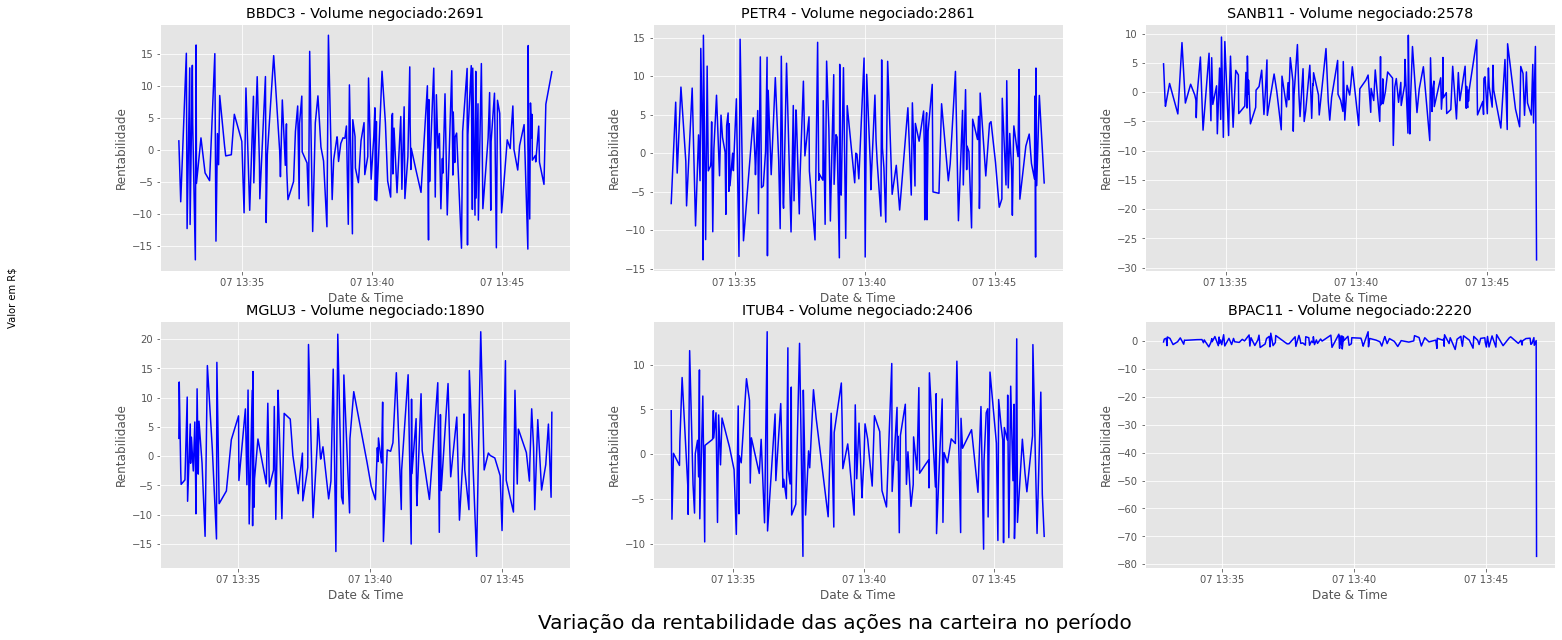

In [309]:
plt.style.use('ggplot') #estilo do gráfico
fig, eixo = plt.subplots(2,3, sharex=False, sharey=False, figsize=(25,10))
a =0 
for i in range(0,2):
  for j in range(0,3):

    x = all_stock[a]  

    rentabilidade = desafio[desafio.Stock == x][['Date & Time','Amount','Price']]
    rentabilidade['Price'] = abs(rentabilidade.Price)
    volume_negociado = abs(rentabilidade.Amount).sum()
    rentabilidade = rentabilidade.groupby('Date & Time').agg({'Amount':sum,
                                                              'Price':'mean'})
    rentabilidade.reset_index(inplace=True)    
    
    rentabilidade.sort_values(by='Date & Time')

    rentabilidade['Rentabilidade'] = rentabilidade['Price']/ rentabilidade.Price.shift() * 100 -100

    
    
    sns.lineplot(x='Date & Time', y='Rentabilidade', data=rentabilidade, ax=eixo[i,j], color='b')
    eixo[i,j].set_title(x + " - Volume negociado:" + str(volume_negociado))

    a += 1
      

    

fig.text(0.5,0.04,'Variação da rentabilidade das ações na carteira no período', ha='center', fontsize=20)
fig.text(0.04, 0.5, 'Valor em R$', va='center', rotation='vertical')

In [305]:
import plotly.graph_objs as go # o gráfico é intereativo dessa biblioteca


In [307]:
#último valor gravado em rentabilidade foi da ação BPAC11
def plot_lines(rentabilidade, columns=['Rentabilidade']):

  fig = go.Figure()
  for c in columns:
    fig.add_trace(go.Scatter(x=list(rentabilidade.index),
                             y = rentabilidade[c],
                             mode = 'markers+lines',
                             name=c))
  return fig

In [308]:
plot_lines(rentabilidade)